# King County Housing Price Prediction

## Overview

This happens in King County Seattle not BK

, often referred to as Brooklyn, is one of the most popular neighborhood in United States. Therefore, evaluating and predicting housing prices accurately provides. immense value for all participants of real estate transaction in this neighborhood. This project seeks to analyze and model the given Kings County real estate data to predict future sale prices of different properties. 

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#%matplotlib.inline

In [7]:
!dir data

 Volume in drive D is Data
 Volume Serial Number is 8601-2CF3

 Directory of D:\Kings_County_Housing_Price_Prediction\data

10/16/2020  03:58 PM    <DIR>          .
10/16/2020  03:58 PM    <DIR>          ..
10/16/2020  03:58 PM           486,579 kc_house_data_test_features.csv
10/16/2020  03:58 PM         2,118,903 kc_house_data_train.csv
               2 File(s)      2,605,482 bytes
               2 Dir(s)  933,080,879,104 bytes free


In [8]:
kc_df = pd.read_csv("data/kc_house_data_train.csv", index_col=0)

In [9]:
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [35]:
kc_df.bedrooms.unique()

array([ 4,  5,  3,  2,  6,  1,  7,  0,  8, 11,  9, 10, 33], dtype=int64)

In [36]:
kc_df.bathrooms.unique()

array([2.25, 3.  , 2.5 , 3.5 , 2.  , 1.  , 1.75, 3.75, 3.25, 4.25, 2.75,
       1.5 , 4.5 , 4.  , 4.75, 0.75, 0.  , 5.  , 5.5 , 6.  , 1.25, 5.75,
       6.75, 5.25, 6.5 , 8.  , 7.5 , 6.25, 0.5 , 7.75])

In [37]:
kc_df.yr_renovated.unique()

array([   0, 1998, 1983, 1989, 1985, 2002, 1999, 2010, 2015, 1990, 1972,
       2013, 1955, 2001, 2000, 2011, 1956, 2006, 1965, 1987, 2007, 1995,
       2014, 1945, 1993, 1992, 1979, 1980, 1946, 1988, 1958, 1996, 2004,
       1973, 2005, 1994, 2003, 1986, 1981, 1953, 2012, 1991, 1975, 1977,
       1978, 1968, 2009, 1984, 2008, 1967, 1997, 1974, 1982, 1963, 1969,
       1940, 1970, 1971, 1957, 1976, 1960, 1962, 1944, 1959, 1964, 1950,
       1934, 1951, 1948], dtype=int64)

In [38]:
kc_df["renovated"] = kc_df.yr_renovated.apply(lambda x: 1 if x > 0 else 0)

In [39]:
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,0
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,0
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,0
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,0


In [10]:
kc_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [40]:
kc_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated'],
      dtype='object')

In [41]:
kc_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
id,1.000000,-0.015644,-0.001529,0.003833,-0.014251,-0.129837,0.017126,0.000101,0.012594,-0.014272,...,-0.013932,-0.003516,0.013697,-0.019560,-0.008166,-0.001865,0.017388,-0.007494,-0.139605,-0.019544
price,-0.015644,1.000000,0.305106,0.524335,0.703540,0.086803,0.256985,0.275779,0.395485,0.036099,...,0.607760,0.323312,0.056450,0.117770,-0.048958,0.302394,0.019327,0.585567,0.081423,0.117409
bedrooms,-0.001529,0.305106,1.000000,0.507867,0.570428,0.029375,0.172975,-0.008581,0.079741,0.025266,...,0.472492,0.300085,0.153769,0.013679,-0.147515,-0.002170,0.124279,0.387589,0.026665,0.013381
bathrooms,0.003833,0.524335,0.507867,1.000000,0.755270,0.085470,0.497967,0.065848,0.188817,-0.122976,...,0.686853,0.282700,0.507761,0.048140,-0.201527,0.023074,0.221308,0.568080,0.086499,0.047620
sqft_living,-0.014251,0.703540,0.570428,0.755270,1.000000,0.166810,0.357169,0.109738,0.283336,-0.061530,...,0.876696,0.435529,0.319397,0.051448,-0.195893,0.052646,0.234453,0.755066,0.179570,0.051159
sqft_lot,-0.129837,0.086803,0.029375,0.085470,0.166810,1.000000,-0.002205,0.015356,0.073058,-0.013715,...,0.180755,0.008065,0.054228,0.004520,-0.126590,-0.082029,0.226190,0.136959,0.701875,0.004608
floors,0.017126,0.256985,0.172975,0.497967,0.357169,-0.002205,1.000000,0.025132,0.025883,-0.259230,...,0.528509,-0.247481,0.483657,0.005985,-0.060560,0.048227,0.128795,0.283933,-0.008170,0.005904
waterfront,0.000101,0.275779,-0.008581,0.065848,0.109738,0.015356,0.025132,1.000000,0.407565,0.009608,...,0.077162,0.083433,-0.021981,0.094268,0.034282,-0.013331,-0.042728,0.091090,0.026895,0.094648
view,0.012594,0.395485,0.079741,0.188817,0.283336,0.073058,0.025883,0.407565,1.000000,0.045060,...,0.164747,0.279939,-0.049593,0.091291,0.089475,0.003820,-0.077572,0.279999,0.073185,0.091448
condition,-0.014272,0.036099,0.025266,-0.122976,-0.061530,-0.013715,-0.259230,0.009608,0.045060,1.000000,...,-0.157466,0.166923,-0.358921,-0.060969,0.007068,-0.009927,-0.109200,-0.094307,-0.007125,-0.060471


<AxesSubplot:>

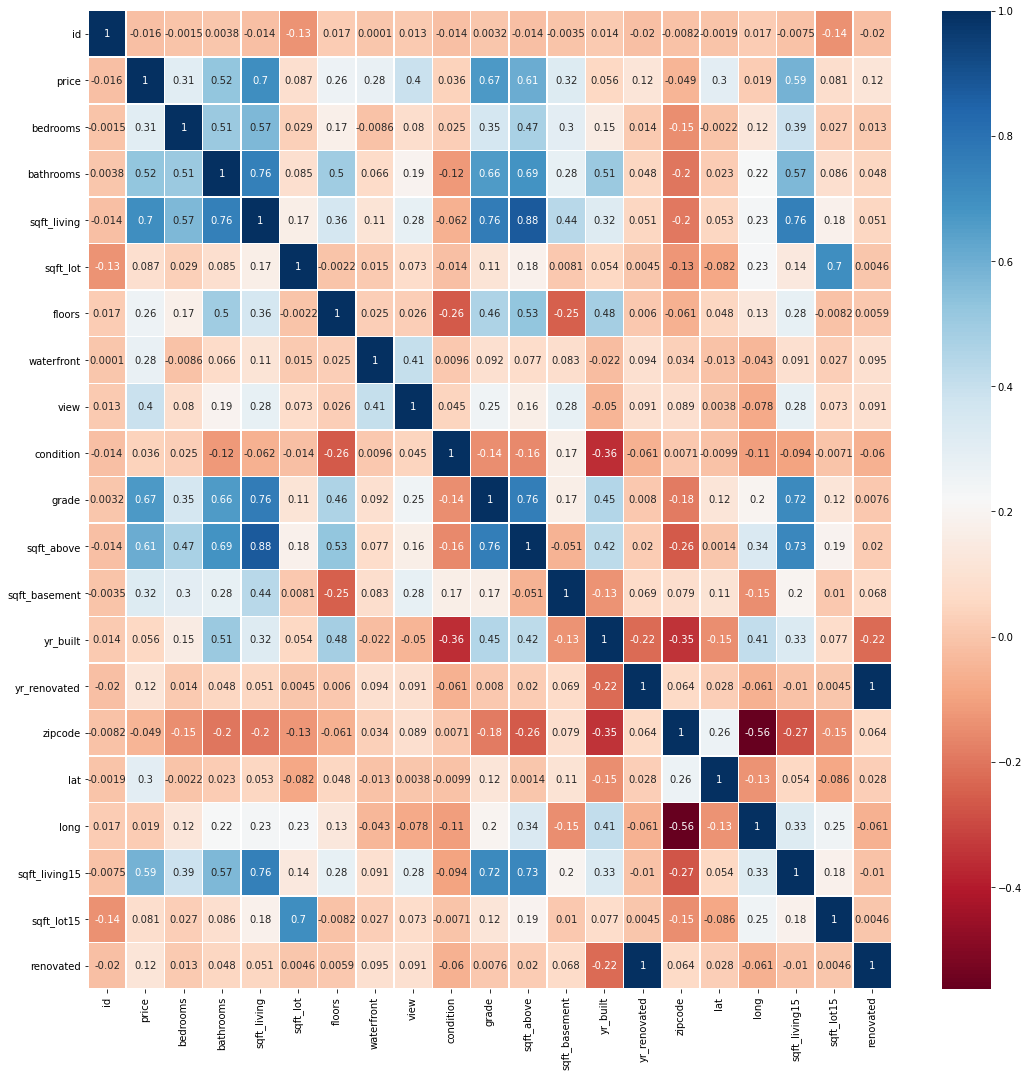

In [54]:
plt.subplots(figsize=(18,18))
sns.heatmap(kc_df.corr(), annot=True, linewidths=.5, cmap="RdBu")

<AxesSubplot:>

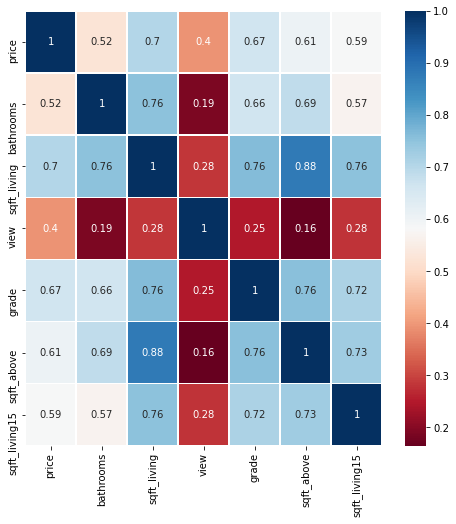

In [59]:
high_corr = ["price","bathrooms", "sqft_living","view","grade","sqft_above","sqft_living15"] #correlation greater than or equal to 0.4
plt.subplots(figsize=(8,8))
sns.heatmap(kc_df[high_corr].corr(), annot=True, linewidths=.5, cmap="RdBu")

In [45]:
check1 = smf.ols(formula="price~sqft_living+sqft_basement+sqft_lot+C(renovated)", data=kc_df).fit()
check1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     4368.
Date:                Sun, 18 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:36:40   Log-Likelihood:            -2.4033e+05
No. Observations:               17290   AIC:                         4.807e+05
Df Residuals:                   17285   BIC:                         4.807e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -5.48e+04   5011.690    -10.935      0.000   -6.46e+04    -4.5e+04
C(renovated)[T.1]  1.505e+05      1e+04     15.038      0.000    1.31e+05     1.7e+05
sqft_living         283.3923      2.459    115.232      0.000     278.572     288.213
sqft_basement        11.6771      5.040      2.317      0.021       1.799      21.555
sqft_lot             -0.2663      0.048     -5.533      0.000      -0.361      -0.172
==============================================================================
Omnibus:                    12231.430   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           489698.152
Skew:                           2.926   Prob(JB):                         0.00
Kurtosis:                      28.407   Cond. No.                     2.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
check1 = smf.ols(formula="price~sqft_living+sqft_basement+sqft_lot+C(renovated)", data=kc_df).fit()
check1.summary()